 #### Streaming data visualisation
 a. For the incoming climate data plot the line graph of air temperature against
 arrival time. You need to label some interesting points such as maximum
 and minimumvalues.

In [34]:
%pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 11.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>


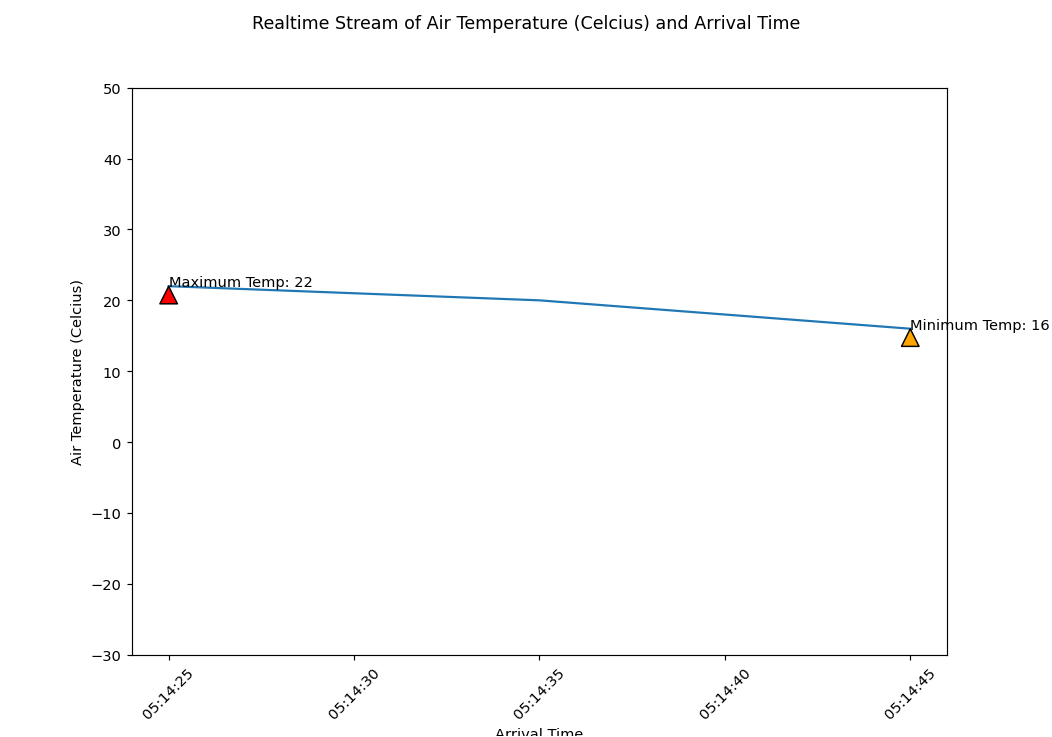

KeyboardInterrupt: 

In [1]:
from kafka3 import KafkaConsumer
from json import loads
import json
import datetime as dt
import matplotlib.pyplot as plt
import statistics
from collections import Counter
from bson.objectid import ObjectId

##
# cleaned: {'air_temperature_celcius': 6, 'relative_humidity': 39.0, 'windspeed_knots': 1.8, 'max_wind_speed': 5.1, 'precipitation ': ' 0.01G', 'GHI_w/m2': 56, 'date': '2024-07-11', 'created_date': '2024-05-23 13:59:02', 'hotspots': [{'latitude': -37.3863, 'longitude': 142.8822, 'confidence': 85, 'surface_temperature_celcius': 59, 'producer': 'hotspot_aqua', 'created_time': '05:51:57'}, {'latitude': -35.957, 'longitude': 141.088, 'confidence': 79, 'surface_temperature_celcius': 49, 'producer': 'hotspot_aqua', 'created_time': '13:04:21'}, {'latitude': -36.3831, 'longitude': 145.7276, 'confidence': 71, 'surface_temperature_celcius': 45, 'producer': 'hotspot_terra', 'created_time': '14:18:41'}], 'fire': 'other'}

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook
hostip = "10.192.104.132"
topic = "PartB"

def connect_kafka_consumer():
    _consumer = None
    try:
        # auto offset reset is optional, it refers to the position
        # it not included, it will ignore all the positions (entry time)
        # of the tuples, it will only return the latest, by default it is latest
        # if earliest, it will return all
        _consumer = KafkaConsumer(
            topic,
            # stop iteration if no message after 10 sec
            # auto offset reset - specifies what to do when the consumer is first started
            # earliest - start reading from the earliest available offset
            # latest - only read the newest messages send after we start
            # IMPORTANT MAY BE ASKED IN INTERVIEWS
            consumer_timeout_ms=10000,                       
            auto_offset_reset='earliest',
            bootstrap_servers=[f'{hostip}:9092'],
            value_deserializer=lambda x: loads(
                x.decode('ascii')),
            api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer


def init_plot():
    try:
        width = 10
        height = 7

        # create new figure
        fig = plt.figure(figsize=(width, height))
        # adding the subplot axes to the given grid position
        ax = fig.add_subplot(111) 
        
        fig.suptitle(
            'Realtime Stream of Air Temperature (Celcius) and Arrival Time')

        # Create axis for plot
        ax.set_xlabel('Arrival Time')
        ax.set_ylabel('Air Temperature (Celcius)')
        ax.set_yticks([-30, -20, -10, 0, 10, 20, 30, 40, 50])
        ax.set_ylim(-30, 50)

        # Draw plot
        fig.show()
        fig.canvas.draw()

        return fig, ax

    except Exception as ex:
        print(str(ex))


def consume_messages(consumer, fig, asx):
    if not consumer or not fig or not ax:  # Check if consumer, fig, and ax are valid
        print("Consumer, figure, or axis not initialized properly.")
        return
    
    try:
        # container for x and y values
        x, y = [], []
        # print('Waiting for messages')

        for message in consumer:
            json_object = message.value 
            if 'data' in json_object:  # Check for presence of 'data' key
                data_string = json_object['data']  # Extract the JSON string

                # Assuming data_string is a JSON string
                json_object = json.loads(data_string)  # Parse the nested JSON
#             print(json_object)
            if 'air_temperature_celcius' in json_object:
                # Extract arrival time and air temperature
                arrival_time = dt.datetime.strptime(json_object['created_date'], "%Y-%m-%d %H:%M:%S")  # Convert to datetime object
                air_temperature = json_object['air_temperature_celcius']
#                 print(arrival_time, air_temperature)

                x.append(arrival_time)
                y.append(air_temperature)

                # start plotting when we have 10 data points
            if len(y) > 2:
                    ax.clear()
                    ax.plot(x, y) 
                    ax.set_xlabel('Arrival Time')
                    ax.set_ylabel('Air Temperature (Celcius)')
                    ax.set_yticks([-30, -20, -10, 0, 10, 20, 30, 40, 50])
                    ax.set_ylim(-30, 50)

                    # rotate dates 
                    ax.tick_params(axis='x', labelrotation=45) 

                    # max & min arrows 
                    y_min = min(y) 
                    x_min_pos = y.index(y_min)
                    x_min = x[x_min_pos]

                    y_max = max(y) 
                    x_max_pos = y.index(y_max)
                    x_max = x[x_max_pos]

                    # labels
                    min_label = 'Minimum Temp: ' + str(y_min) 
                    max_label = 'Maximum Temp: ' + str(y_max) 

                    # annotate axis 
                    ax.annotate(min_label, xy=(x_min, y_min), xytext=(
                        x_min, y_min), arrowprops=dict(facecolor='orange', shrink=0.04))
                    ax.annotate(max_label, xy=(x_max, y_max), xytext=(
                        x_max, y_max), arrowprops=dict(facecolor='red', shrink=0.04))

                    fig.canvas.draw()

                    # removing the item in the first position to make way for 
                    # subsequent items
                    x.pop(0)
                    y.pop(0)

        plt.close('all')
        
    except Exception as ex:
        print(str(ex))


if __name__ == '__main__':

    consumer = connect_kafka_consumer()
    fig, ax = init_plot()
    consume_messages(consumer, fig, ax)

 #### Static data visualisation
 a. Plot a bar chart to visualise the total number of fire records based on each
 hour.

{'_id': ObjectId('6654180a17c362f30bc539ab'), 'air_temperature_celcius': 24, 'relative_humidity': 55.4, 'windspeed_knots': 5.9, 'max_wind_speed': 9.9, 'precipitation ': ' 0.00I', 'GHI_w/m2': 196, 'date': '2024-02-17', 'created_date': '2024-05-27 05:20:06', 'hotspots': [{'latitude': -37.0316, 'longitude': 148.1519, 'confidence': 52, 'surface_temperature_celcius': 35, 'producer': 'hotspot_aqua', 'created_time': '17:31:26'}, {'latitude': -37.8345, 'longitude': 142.447, 'confidence': 50, 'surface_temperature_celcius': 38, 'producer': 'hotspot_aqua', 'created_time': '02:21:18'}, {'latitude': -36.6686, 'longitude': 142.5195, 'confidence': 82, 'surface_temperature_celcius': 56, 'producer': 'hotspot_terra', 'created_time': '22:36:24'}], 'fire': 'natural'}


<IPython.core.display.Javascript object>


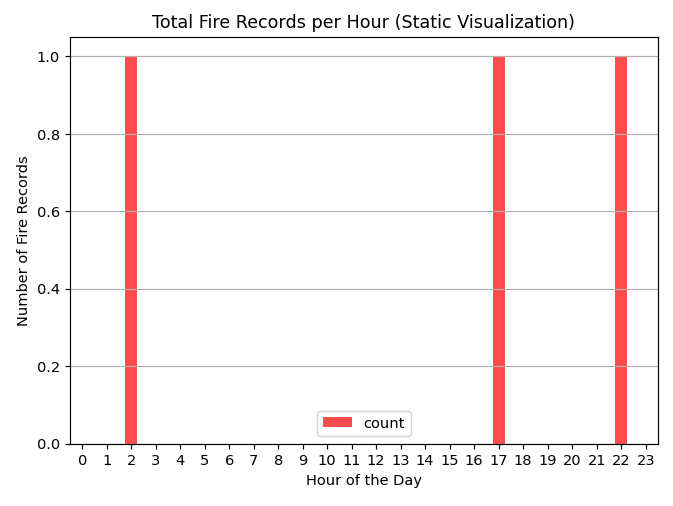

In [17]:
from pymongo import MongoClient
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

hostip = "10.192.104.132"
topic = "PartB"

# CONNECTING TO MONGO
client = MongoClient(hostip, 27017)
db = client["fit3182_assignment_db"]
collection = db["climate_data"]

# Filter out records where 'hotspots' is empty
data = list(collection.find({'hotspots': {'$exists': True, '$not': {'$size': 0}}}))

# set limit for testing
# for record in data:
#     pprint(record)
    
df = pd.DataFrame(data)



# print(df.sample(n=5, random_state=1))

selection = list(collection.aggregate([{'$sample': {'size': 1}}]))[0]
# selection = 664f589ca3e70d2420ad478e
print(selection)


hours = []
for hotspot in selection['hotspots']:
        if 'created_time' in hotspot:
            try:
                hour = int(hotspot['created_time'].split(':')[0])
                hours.append(hour)
            except (IndexError, ValueError):
                # Skip records with improperly formatted 'created_time'
                continue

# Count the number of fire records for each hour
hour_counts = Counter(hours)
# print(hour_counts)

# Create a DataFrame for the counts
fire_records_by_hour = pd.DataFrame.from_dict(hour_counts, orient='index', columns=['count']).sort_index()
# print(fire_records_by_hour)

all_hours = range(24)
fire_records_by_hour = fire_records_by_hour.reindex(all_hours, fill_value=0)

# Create bar chart
fire_records_by_hour.plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fire Records')
plt.title('Total Fire Records per Hour (Static Visualization)')
plt.grid(axis='y')  # Add grid lines for better readability
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust spacing between elements

# Display the bar chart
plt.show()


 b. In a map visualise fire locations as markers. Use a ‘blue’ marker if the 
 cause of the fire was ‘natural’. Otherwise, use a ‘red’ marker. Display detailed
 information such as air temperature, surface temperature, relative humidity,
 and confidence with the marker tooltip. See the example below. You can
 use Folium for map visualisation

In [18]:
import folium
import pandas as pd
from branca.colormap import LinearColormap

# Assuming you have the DataFrame 'df' from the previous code snippet

# Define color mapping for fire cause (natural: blue, other: red)
colormap = LinearColormap(colors=['blue', 'red'], index=[1, 0], vmin=0, vmax=1)

# Create base map centered on a specific location (adjust coordinates as needed)
m = folium.Map(location=[-37.8681, 144.7819], zoom_start=4)  # Melbourne, Australia
# print(df.sample(n=5, random_state=1))


# Function to generate tooltip content based on data
def create_tooltip(row):
    tooltip_text = f"""
    Air Temperature: {selection['air_temperature_celcius']}°C<br>
    Surface Temperature: {hotspot['surface_temperature_celcius']}°C<br>
    Relative Humidity: {selection['relative_humidity']}%<br>
    Confidence: {hotspot['confidence']}%<br>
    """
    return tooltip_text

# Iterate through dictionary and add markers with tooltips
for hotspot in selection['hotspots']:
    latitude = hotspot['latitude']
    longitude = hotspot['longitude']
    cause = selection['fire']  # Assuming 'fire' field exists
    tooltip_content = create_tooltip(hotspot)
    
    # Determine marker color based on fire cause (natural or other)
    color = 'blue' if cause == 'natural' else 'red'

    marker = folium.Marker(
            [latitude, longitude],
            popup=folium.Popup(tooltip_content),
            icon=folium.Icon(color=color)
    )
    marker.add_to(m)

# Add colormap legend (optional)
colormap.add_to(m)

# Display the map
m